In [30]:
'''
    由探空气球测量得到的数据，经过IDL程序read_sounding_data_from_guo.pro和output_sounding_data_as_mwr_data_format.pro处理得到各个高度的温度
    此数据集将作为神经网络的输出端
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import draw_photo_UPAR_module
filepath_1 = r'I:\Data\Personal Data\graduation project\SACOL\original_data\200706\sounding_data_as_MWR_format_200706.txt'
filepath_2 = r'I:\Data\Personal Data\graduation project\SACOL\microwave\2007\200706\2007-06-06_00-02-00_lv2.csv'

In [31]:
#世界时
data_1 = pd.read_csv(filepath_1,sep='  ')
# O_data_1 = data_1.iloc[1:2,0:48]
O_data_1 = data_1.loc[data_1['Time']==2007060612]

In [32]:
#北京时 = 世界时 + 8
data_2 = pd.read_csv(filepath_2)
# photoname_1 = filepath[69:92]
# photoname = photoname_1 + '-' + str(parameter) + '.png'
parameter = 11
a = data_2.loc[data_2['10']==parameter]
Del_columns = data_2.columns[2:10]
a.drop(Del_columns,axis=1,inplace=True)
a.drop('Record',axis=1,inplace=True)
z = a.iloc[:,0:48]
O_data_2 = z.loc[z['Date/Time']=='06/06/07 20:00:18']

['06/06/07 00:03:18' '06/06/07 00:04:19' '06/06/07 00:05:19' ...
 '06/06/07 23:56:19' '06/06/07 23:57:19' '06/06/07 23:58:19']


In [22]:
O_data_2.columns = O_data_1.columns
data = O_data_2
data = data.append(O_data_1)
photoname = 'Compare'

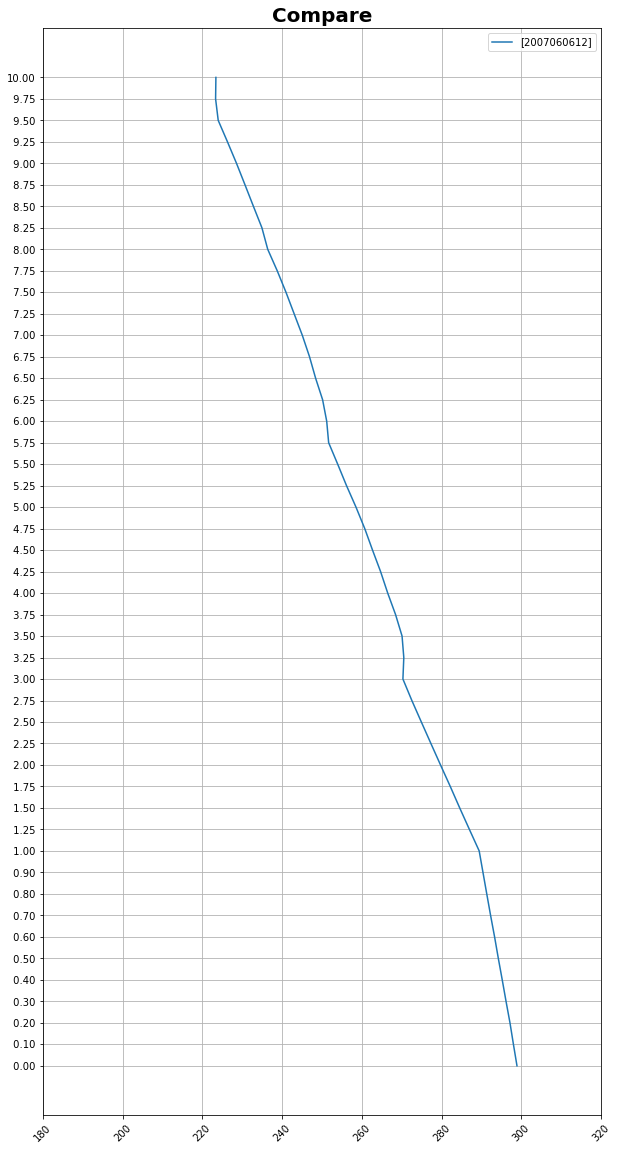

In [23]:
draw_photo_UPAR_module.draw_photo_UPAR(data,photoname)

In [24]:
# plt.rcParams['figure.figsize'] = (10.0,20.0)
# Height = data.columns.values[1:48]
# Len = len(data['Time'])
# i = 0
# while i<Len:
#     print_data = np.array(data.iloc[i:i+1,1:48]).T
#     plt.plot(print_data,Height,label=data['Time'][i:i+1].values)
#     i = i+1
# x_ticks = np.linspace(180, 320, 8)
# plt.xticks(x_ticks,rotation=45)
# # 启动图例
# plt.legend()
# # 添加网格
# plt.grid()
# # 主标题
# plt.title(photoname,fontsize=20,fontweight='bold')
# # 保存图片
# plt.savefig(photoname,bbox_inches = 'tight')
# # 展示图片
# plt.show()